# 데이콘 Basic 전화 해지 여부 분류 AI 경진대회
- train.csv [파일]
    - 30200개의 데이터
    - ID : 샘플 별 고유 ID
    - 가입일 : 서비스에 가입한 일수
    - 음성사서함이용 : 음성사서함 이용 건수
    - 주간통화시간 : 8시 ~ 16시까지의 통화 시간
    - 주간통화횟수 : 8시 ~ 16시까지의 통화 횟수
    - 주간통화요금 : 8시 ~ 16시까지의 통화 요금
    - 저녁통화시간 : 16시 ~ 0시까지의 통화 시간
    - 저녁통화횟수 : 16시 ~ 0시까지의 통화 횟수
    - 저녁통화요금 : 16시 ~ 0시까지의 통화 요금
    - 밤통화시간 : 0시 ~ 8시까지의 통화 시간
    - 밤통화횟수 : 0시 ~ 8시까지의 통화 횟수
    - 밤통화요금 : 0시 ~ 8시까지의 통화 요금
    - 상담전화건수 : 고객센터에 전화를 건 횟수
    - 전화해지여부 : 0(서비스 유지)/ 1(서비스 해지)


In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 한글 폰트 설치

In [26]:
import matplotlib
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = './data/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)


In [18]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

## 데이터 확인

In [19]:
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       12943 non-null  object 
 1   가입일      12943 non-null  int64  
 2   음성사서함이용  12943 non-null  int64  
 3   주간통화시간   12943 non-null  float64
 4   주간통화횟수   12943 non-null  int64  
 5   주간통화요금   12943 non-null  float64
 6   저녁통화시간   12943 non-null  float64
 7   저녁통화횟수   12943 non-null  int64  
 8   저녁통화요금   12943 non-null  float64
 9   밤통화시간    12943 non-null  float64
 10  밤통화횟수    12943 non-null  int64  
 11  밤통화요금    12943 non-null  float64
 12  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


In [22]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [23]:
test.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,159.776713,12.312756,251.066221,159.761724,40.887059,263.656424,159.628216,25.440460,264.052963,157.692112,12.095035,2.301476
std,118.383432,28.069438,85.236623,103.648878,23.062830,75.232035,103.417132,8.288719,74.877379,101.640429,9.459368,2.058855
min,2.000000,0.000000,0.200000,0.000000,0.100000,0.200000,0.000000,0.000000,21.300000,20.000000,2.000000,0.000000
25%,63.000000,0.000000,222.700000,88.000000,24.400000,223.800000,87.000000,22.220000,223.700000,86.000000,4.880000,2.000000
50%,119.000000,1.000000,234.000000,115.000000,30.800000,242.700000,113.000000,23.300000,242.800000,111.000000,9.060000,2.000000
75%,228.000000,22.000000,289.800000,223.000000,45.900000,290.350000,223.000000,28.820000,290.700000,223.000000,20.290000,2.000000
max,2212.000000,1112.000000,481.800000,489.000000,118.100000,481.500000,490.000000,49.990000,481.700000,489.000000,44.980000,11.000000


## Feature 별 히스토그램 분포

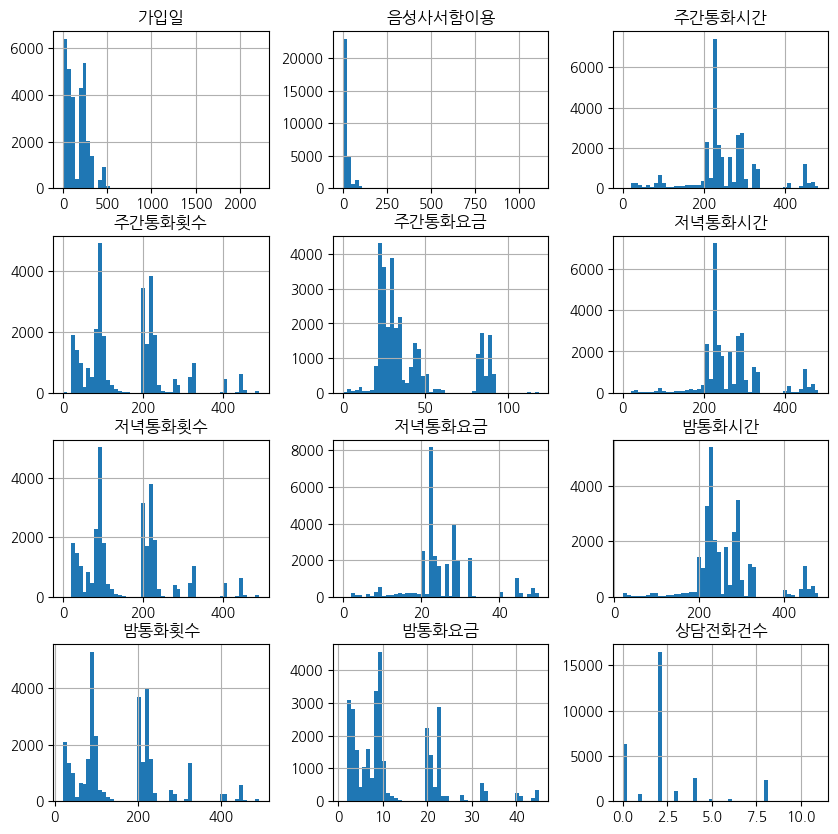

In [24]:
train.drop(['전화해지여부'], axis = 1).hist(bins = 50, figsize = (10, 10))
plt.show()

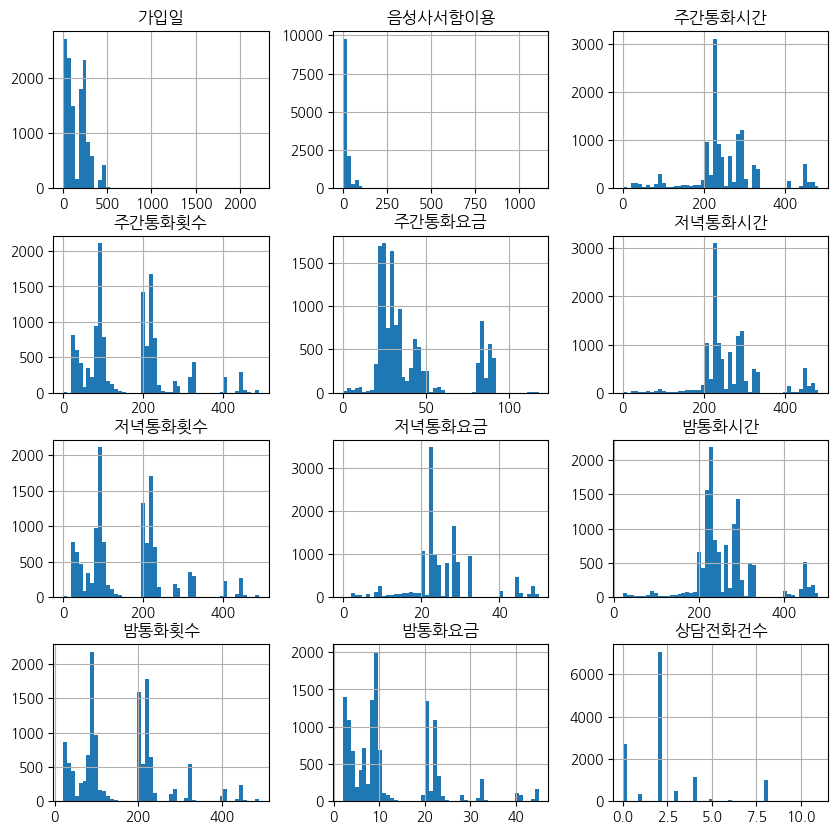

In [27]:
test.hist(bins=50, figsize = (10, 10))
plt.show()

### >> 인사이트
- train, test의 히스토그램분포가 완전히 동일해보임 : 모든 피쳐에 대해 계층적으로 샘플된 것 같음
- 가입일, 음성사서함 이용의 두개 피쳐 꼬리가 두꺼움

# Boxplot 을 활용해 이상치 처리
- IQR Capping을 위해 박스플롯으로 데이터 구성을 살펴보고, upper/lower whisker 값 추출

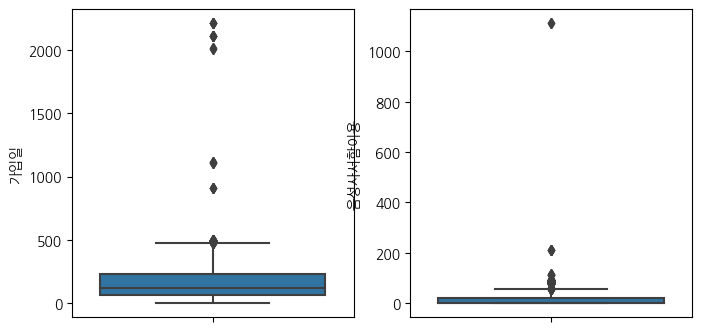

whisker y-values for subplot 1:[1 1]
whisker y-values for subplot 1:[475 475]
whisker y-values for subplot 2:[0 0]
whisker y-values for subplot 2:[55 55]


In [33]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(y = train['가입일'], ax = ax[0])
sns.boxplot(y = train['음성사서함이용'], ax = ax[1])
plt.show()

for i in range(len(ax)):
    whiskers = ax[i].lines[2:4]
    for whisker in whiskers:
        y_data = whisker.get_ydata()
        print(f'whisker y-values for subplot {i+1}:{y_data}')

In [37]:
#추출한 값을 바탕으로 IQR Capping

train.loc[train['가입일']> 475, ['가입일']] = 475

train.loc[train['음성사서함이용'] > 55, '음성사서함이용'] = 55

<AxesSubplot:>

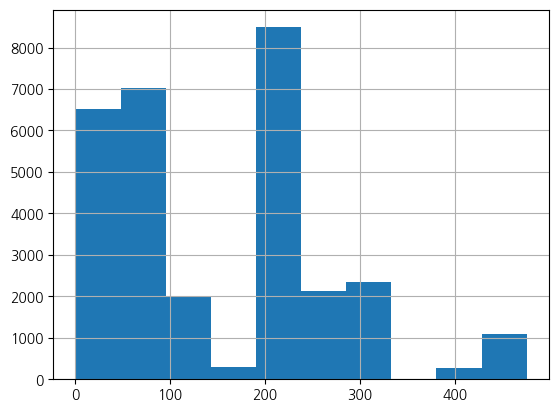

In [38]:
train['가입일'].hist()

<AxesSubplot:>

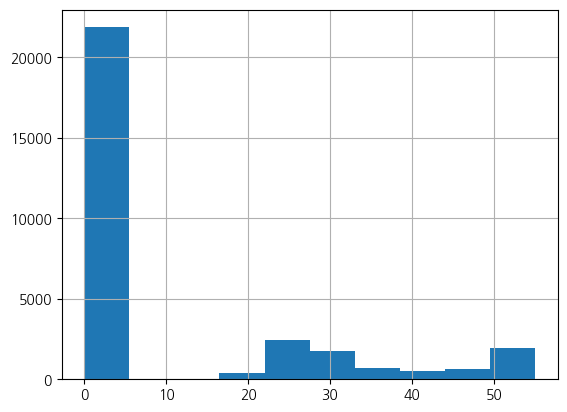

In [39]:
train['음성사서함이용'].hist()

## 상관계수 분석

<AxesSubplot:>

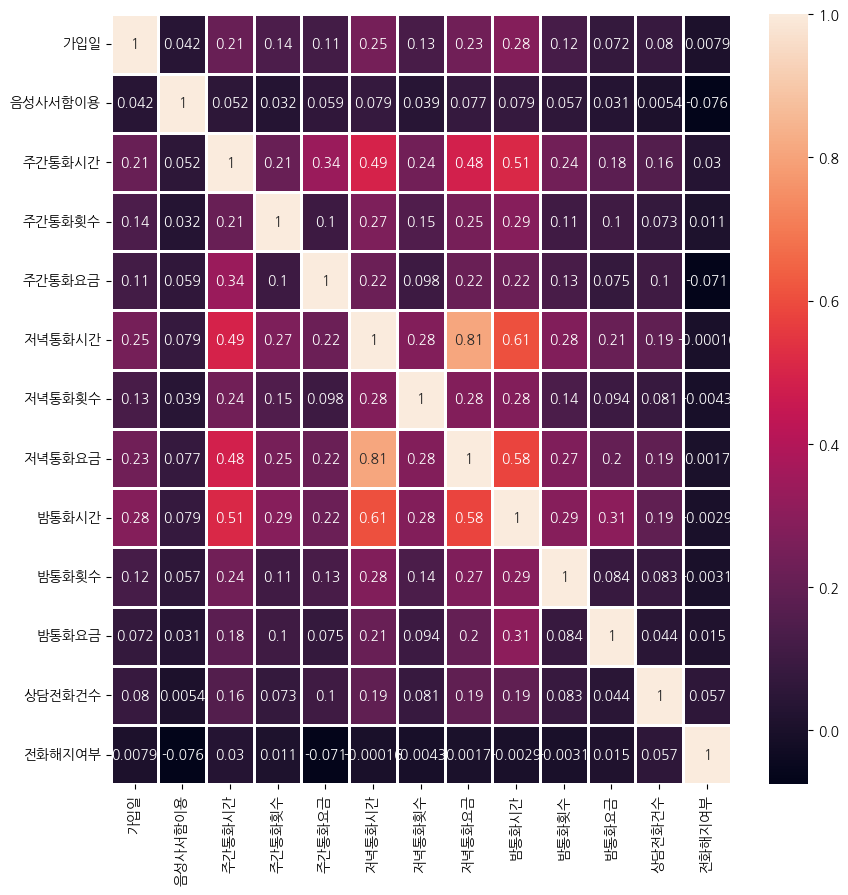

In [40]:
corr_matrix = train.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot=True, linewidth = 1)

In [41]:
corr_matrix['전화해지여부'].sort_values(ascending = False)

전화해지여부     1.000000
상담전화건수     0.057114
주간통화시간     0.029975
밤통화요금      0.014513
주간통화횟수     0.010974
가입일        0.007947
저녁통화요금     0.001711
저녁통화시간    -0.000163
밤통화시간     -0.002872
밤통화횟수     -0.003121
저녁통화횟수    -0.004276
주간통화요금    -0.071006
음성사서함이용   -0.075636
Name: 전화해지여부, dtype: float64

## 산점도를 통해 상관관계 시각화
- 상관계수만으로 파악되지 않는 상관관계를 산점도를 통해 알아보자
- 가설 : 통화길이와 통화요금은 비례한다 / 시간대별 통화횟수는 서로 크게 상관이 없다

In [42]:

from pandas.plotting import scatter_matrix

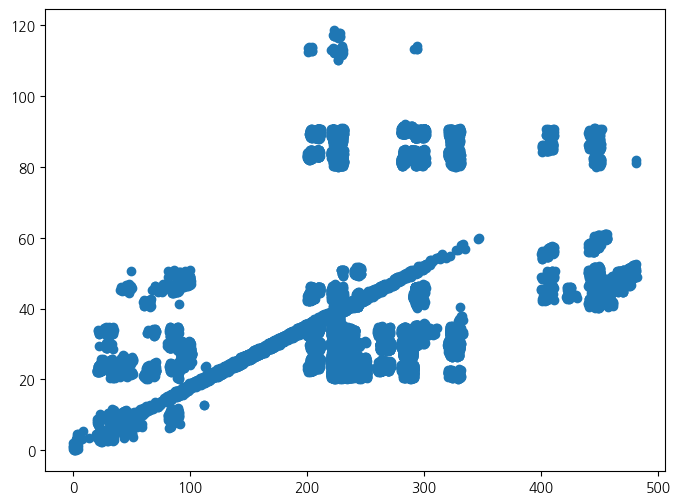

In [48]:
attributes = ['주간통화시간', '주간통화요금', '주간통화횟수']
plt.figure(figsize = (8, 6))

plt.scatter(train['주간통화시간'], train['주간통화요금'])

array([[<AxesSubplot:xlabel='주간통화시간', ylabel='주간통화시간'>,
        <AxesSubplot:xlabel='주간통화요금', ylabel='주간통화시간'>,
        <AxesSubplot:xlabel='주간통화횟수', ylabel='주간통화시간'>],
       [<AxesSubplot:xlabel='주간통화시간', ylabel='주간통화요금'>,
        <AxesSubplot:xlabel='주간통화요금', ylabel='주간통화요금'>,
        <AxesSubplot:xlabel='주간통화횟수', ylabel='주간통화요금'>],
       [<AxesSubplot:xlabel='주간통화시간', ylabel='주간통화횟수'>,
        <AxesSubplot:xlabel='주간통화요금', ylabel='주간통화횟수'>,
        <AxesSubplot:xlabel='주간통화횟수', ylabel='주간통화횟수'>]], dtype=object)

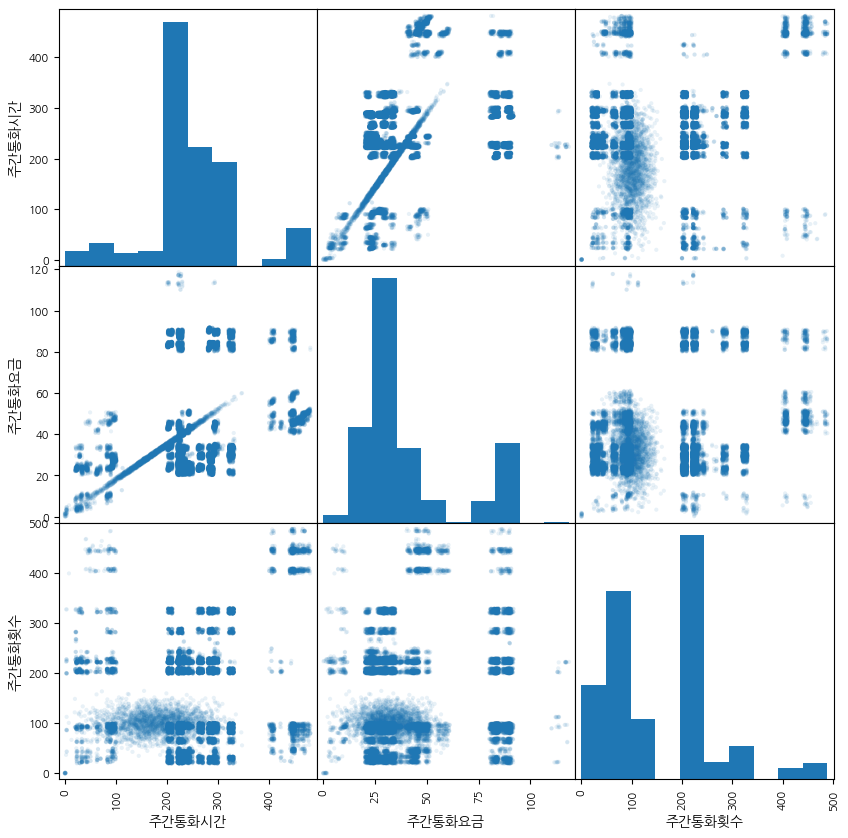

In [45]:
# 한번에 보기
scatter_matrix(train[attributes], figsize = (10, 10), alpha = 0.1)

array([[<AxesSubplot:xlabel='주간통화시간', ylabel='주간통화시간'>,
        <AxesSubplot:xlabel='저녁통화시간', ylabel='주간통화시간'>,
        <AxesSubplot:xlabel='밤통화시간', ylabel='주간통화시간'>],
       [<AxesSubplot:xlabel='주간통화시간', ylabel='저녁통화시간'>,
        <AxesSubplot:xlabel='저녁통화시간', ylabel='저녁통화시간'>,
        <AxesSubplot:xlabel='밤통화시간', ylabel='저녁통화시간'>],
       [<AxesSubplot:xlabel='주간통화시간', ylabel='밤통화시간'>,
        <AxesSubplot:xlabel='저녁통화시간', ylabel='밤통화시간'>,
        <AxesSubplot:xlabel='밤통화시간', ylabel='밤통화시간'>]], dtype=object)

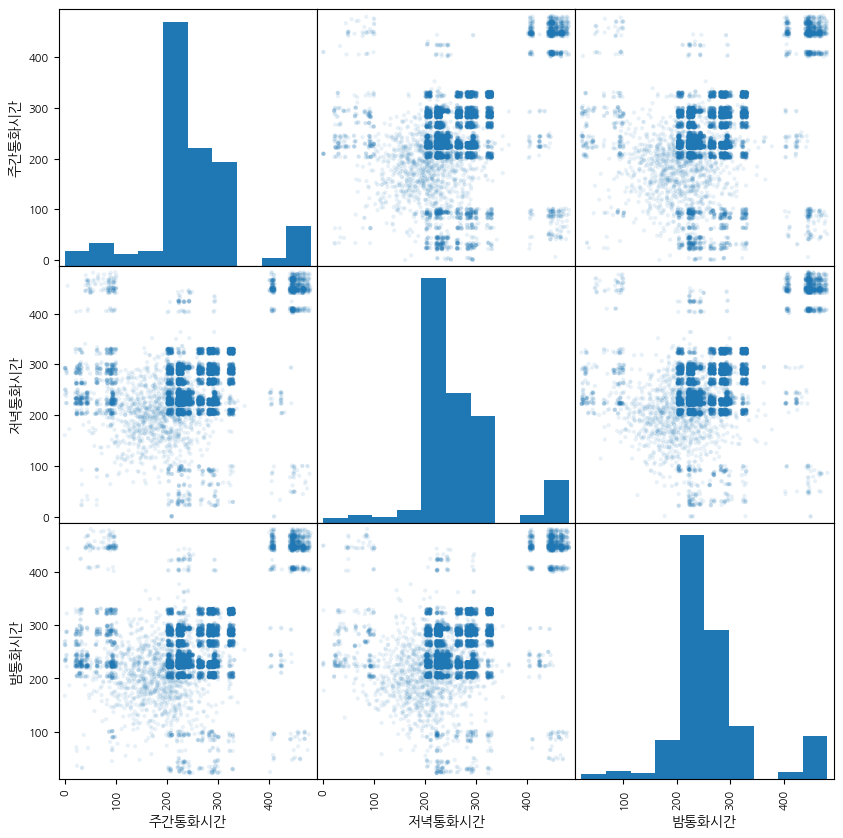

In [52]:
scatter_matrix(test[attributes], figsize=(10, 10), alpha=0.1)

### 인사인트
- ['주간통화시간', '주간통화요금', '주간통화횟수'] 간에 비정상적 상관관계

## 통화 시간대별 상관관계

array([[<AxesSubplot:xlabel='주간통화시간', ylabel='주간통화시간'>,
        <AxesSubplot:xlabel='저녁통화시간', ylabel='주간통화시간'>,
        <AxesSubplot:xlabel='밤통화시간', ylabel='주간통화시간'>],
       [<AxesSubplot:xlabel='주간통화시간', ylabel='저녁통화시간'>,
        <AxesSubplot:xlabel='저녁통화시간', ylabel='저녁통화시간'>,
        <AxesSubplot:xlabel='밤통화시간', ylabel='저녁통화시간'>],
       [<AxesSubplot:xlabel='주간통화시간', ylabel='밤통화시간'>,
        <AxesSubplot:xlabel='저녁통화시간', ylabel='밤통화시간'>,
        <AxesSubplot:xlabel='밤통화시간', ylabel='밤통화시간'>]], dtype=object)

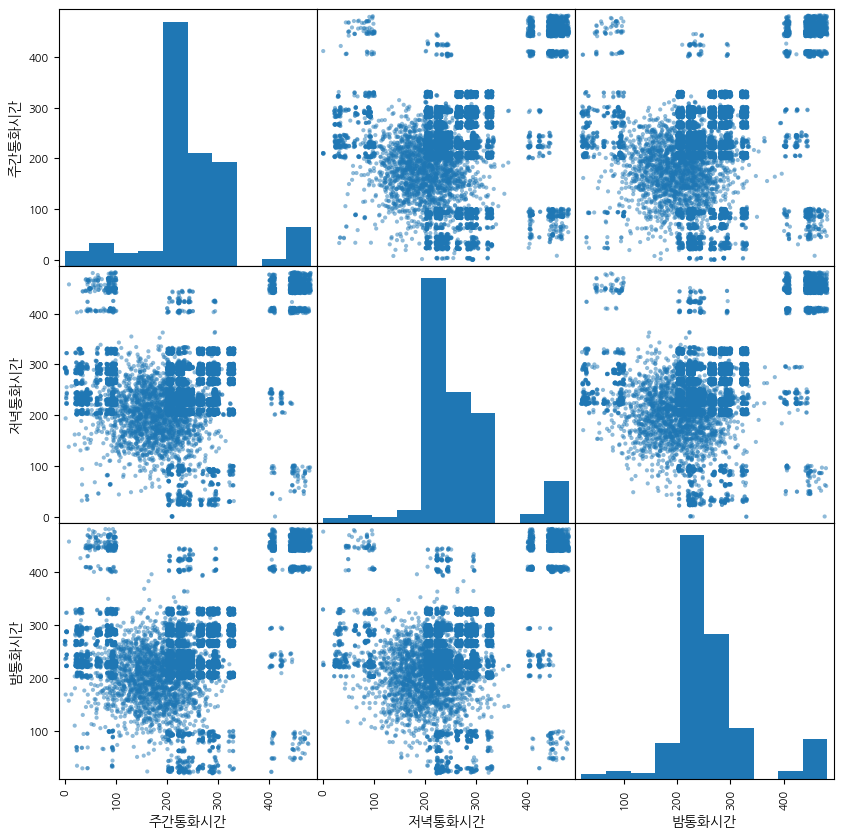

In [54]:
attributes = ['주간통화시간', '저녁통화시간', '밤통화시간']
scatter_matrix(train[train['전화해지여부'] == 0][attributes], figsize = (10, 10))

## seaborn pairplot을 이용해 레이블간 관계 살펴보기

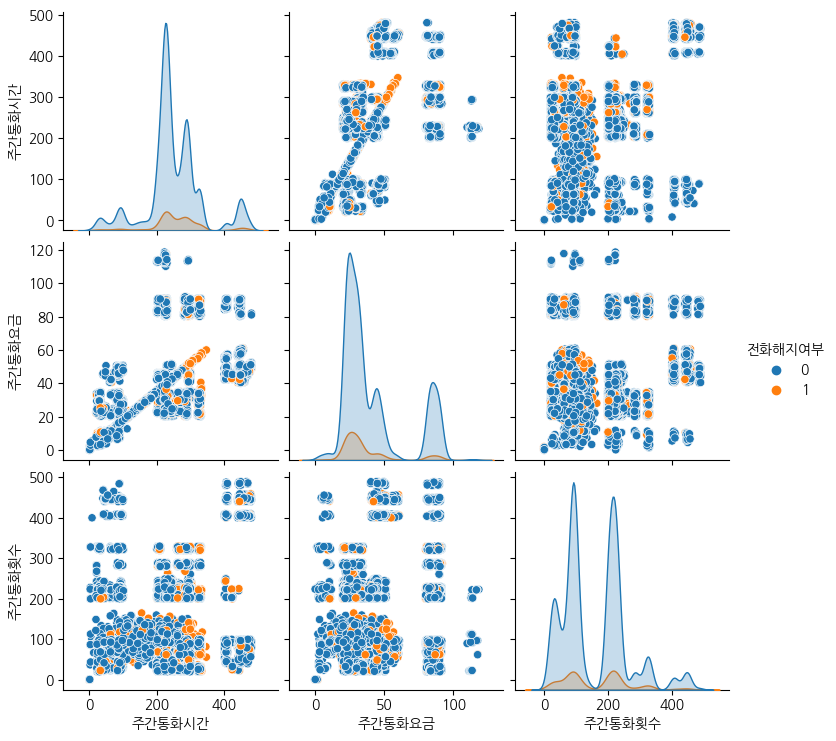

In [55]:
attributes = ['주간통화시간', '주간통화요금', '주간통화횟수', '전화해지여부']
sns.pairplot(train[attributes], hue='전화해지여부')

### 인사이트 
- 주간통화시간, 주간통화요금 간 산점도에 좋은 상관관계가 보임!

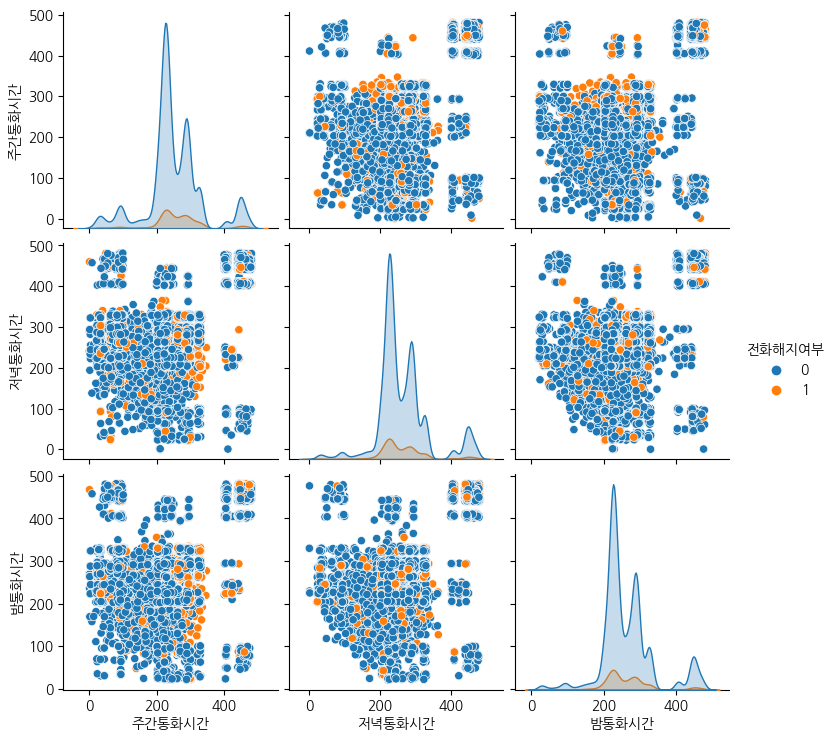

In [56]:
attributes = ['주간통화시간', '저녁통화시간', '밤통화시간', '전화해지여부']
sns.pairplot(train[attributes], hue='전화해지여부')

## feature Engineering 아이디어

In [57]:
train.head().T

,0,1,2,3,4
ID,TRAIN_00000,TRAIN_00001,TRAIN_00002,TRAIN_00003,TRAIN_00004
가입일,329,2,93,223,222
음성사서함이용,0,55,28,1,0
주간통화시간,99.2,323.9,282.4,221.4,96.3
주간통화횟수,93,323,323,223,222
주간통화요금,27.3,83.7,34.2,25.1,28.7
저녁통화시간,268.8,269.4,207.0,233.0,223.9
저녁통화횟수,68,326,322,61,69
저녁통화요금,28.92,32.09,32.82,23.9,28.08
밤통화시간,262.9,322.8,280.8,203.8,263.1


In [58]:
train['총통화시간'] = train['주간통화시간'] + train['저녁통화시간'] + train['밤통화시간']
train['총통화요금'] = train['주간통화요금'] + train['저녁통화요금'] + train['밤통화요금']
train['총통화횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']

train['평균통화시간'] = train['총통화시간'] / train['총통화횟수']
train['평균통화요금'] = train['총통화요금'] / train['총통화횟수']

In [59]:
train.head().T

,0,1,2,3,4
ID,TRAIN_00000,TRAIN_00001,TRAIN_00002,TRAIN_00003,TRAIN_00004
가입일,329,2,93,223,222
음성사서함이용,0,55,28,1,0
주간통화시간,99.2,323.9,282.4,221.4,96.3
주간통화횟수,93,323,323,223,222
주간통화요금,27.3,83.7,34.2,25.1,28.7
저녁통화시간,268.8,269.4,207.0,233.0,223.9
저녁통화횟수,68,326,322,61,69
저녁통화요금,28.92,32.09,32.82,23.9,28.08
밤통화시간,262.9,322.8,280.8,203.8,263.1


In [61]:
# 통화시간과 통화횟수 >> 통화 사용량으로 해석

train['주간통화사용량'] = train['주간통화시간'] + train['주간통화횟수']
train['저녁통화사용량'] = train['저녁통화시간'] + train['저녁통화횟수']
train['밤통화사용량'] = train['밤통화시간'] + train['밤통화횟수']
train['전체통화사용량'] = train['주간통화사용량'] + train['저녁통화사용량'] + train['밤통화사용량']

In [62]:
train['평균_상담전화건수'] = train['상담전화건수']/train['가입일']

In [64]:
train.head().T

,0,1,2,3,4
ID,TRAIN_00000,TRAIN_00001,TRAIN_00002,TRAIN_00003,TRAIN_00004
가입일,329,2,93,223,222
음성사서함이용,0,55,28,1,0
주간통화시간,99.2,323.9,282.4,221.4,96.3
주간통화횟수,93,323,323,223,222
주간통화요금,27.3,83.7,34.2,25.1,28.7
저녁통화시간,268.8,269.4,207.0,233.0,223.9
저녁통화횟수,68,326,322,61,69
저녁통화요금,28.92,32.09,32.82,23.9,28.08
밤통화시간,262.9,322.8,280.8,203.8,263.1


## 주성분분석

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [66]:
temp = train.drop(['ID', '전화해지여부'], axis = 1)
temp

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,총통화시간,총통화요금,총통화횟수,평균통화시간,평균통화요금,주간통화사용량,저녁통화사용량,밤통화사용량,전체통화사용량,평균_상담전화건수
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,...,630.9,89.11,489,1.290184,0.182229,192.2,336.8,590.9,1119.9,0.006079
1,2,55,323.9,323,83.7,269.4,326,32.09,322.8,209,...,916.1,148.11,858,1.067716,0.172622,646.9,595.4,531.8,1774.1,1.000000
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,...,770.2,75.30,973,0.791572,0.077390,605.4,529.0,608.8,1743.2,0.000000
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,...,658.2,58.36,518,1.270656,0.112664,444.4,294.0,437.8,1176.2,0.000000
4,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,...,583.3,59.58,514,1.134825,0.115914,318.3,292.9,486.1,1097.3,0.036036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,263,55,289.6,201,21.8,280.5,323,29.88,208.0,66,...,778.1,60.96,590,1.318814,0.103322,490.6,603.5,274.0,1368.1,0.007605
30196,283,55,210.7,280,90.5,284.1,202,32.80,287.8,203,...,782.6,129.58,685,1.142482,0.189168,490.7,486.1,490.8,1467.6,0.007067
30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,...,749.9,48.54,160,4.686875,0.303375,255.4,265.9,388.6,909.9,0.083333
30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,...,823.9,79.36,691,1.192330,0.114848,464.4,562.6,487.9,1514.9,0.031746


In [67]:
# PCA에 넣기 전, 모든 특성의 범위를 똑같이 조정

scaler = StandardScaler()
temp = scaler.fit_transform(temp)
temp

array([[ 1.51555731, -0.59784541, -1.7933644 , ...,  1.20208808,
        -0.39185578, -0.28308324],
       [-1.38986909,  2.63257398,  0.86889628, ...,  0.78520167,
         1.54951929, 10.1247979 ],
       [-0.58132535,  1.04673173,  0.3772015 , ...,  1.32835317,
         1.45782181, -0.34674001],
       ...,
       [-1.19439698, -0.59784541, -0.33368253, ..., -0.22491905,
        -1.01504252,  0.52588815],
       [-0.84787824, -0.53911051,  0.14024016, ...,  0.47553477,
         0.7803288 , -0.01431023],
       [ 0.36937992, -0.53911051,  0.9068101 , ...,  1.35163109,
         0.8972505 , -0.34674001]])

In [68]:
pca = PCA()
pca.fit(temp)

PCA()

In [70]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[8.11199775e+00 3.20494170e+00 1.45832327e+00 1.40720377e+00
 1.37456372e+00 1.32514133e+00 9.87891249e-01 9.70975277e-01
 9.02446345e-01 6.86627363e-01 5.62808031e-01 4.73364807e-01
 2.82074976e-01 2.19738547e-01 3.26303693e-02 1.74688397e-31
 1.33530997e-31 1.18410629e-31 7.93613165e-32 5.44228542e-32
 4.33792803e-32 2.23177237e-32]
[3.68714961e-01 1.45674344e-01 6.62852265e-02 6.39616899e-02
 6.24781001e-02 6.02317024e-02 4.49026608e-02 4.41337784e-02
 4.10189301e-02 3.12093012e-02 2.55813361e-02 2.15158697e-02
 1.28211653e-02 9.98778506e-03 1.48314949e-03 7.94011875e-33
 6.06938980e-33 5.38212310e-33 3.60721312e-33 2.47368419e-33
 1.97172018e-33 1.01440840e-33]


In [72]:
sum = 0
for i, ratio in enumerate(pca.explained_variance_ratio_):
    sum += ratio
    print(f'{sum} by PCA{i}')

0.3687149607782298 by PCA0
0.5143893049600464 by PCA1
0.5806745315022896 by PCA2
0.6446362213891724 by PCA3
0.7071143214815847 by PCA4
0.7673460238867678 by PCA5
0.8122486846624721 by PCA6
0.8563824630921743 by PCA7
0.8974013931915273 by PCA8
0.9286106944071167 by PCA9
0.9541920305258023 by PCA10
0.9757079001853963 by PCA11
0.9885290654488754 by PCA12
0.9985168505061389 by PCA13
1.0000000000000002 by PCA14
1.0000000000000002 by PCA15
1.0000000000000002 by PCA16
1.0000000000000002 by PCA17
1.0000000000000002 by PCA18
1.0000000000000002 by PCA19
1.0000000000000002 by PCA20
1.0000000000000002 by PCA21


### 7번 성분까지 사용 후, pca 진행

In [88]:
temp = pca.fit_transform(temp)
temp = pd.DataFrame(temp)
temp

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.434679,-0.370313,-0.753919,-3.053115,-0.241105,-0.437954,-1.085362,1.190369,2.226592,-1.301921,...,-0.095340,-0.119944,-0.031611,1.465362e-15,8.863961e-15,1.700623e-15,1.940977e-15,-3.879735e-15,-8.000035e-15,-3.980582e-15
1,4.640187,0.171327,4.018484,1.098926,6.595618,3.324861,2.445157,3.054868,-0.598759,0.745166,...,-0.601950,-0.046622,-0.487551,-6.954042e-16,-2.544801e-15,-4.543369e-15,-2.423644e-15,-8.937752e-15,5.861885e-16,2.983724e-15
2,3.159454,-3.145138,0.672319,-0.474814,-0.425245,-0.336884,0.901805,0.610188,-1.266183,0.217799,...,-1.580995,-0.080674,-0.067884,-3.142040e-14,3.174224e-15,-1.888730e-14,-4.041067e-15,1.562061e-14,-6.313988e-15,-1.653915e-15
3,-0.957569,-1.576070,0.315229,-0.678349,-1.606552,0.433024,-0.454745,-0.028296,-0.235434,-0.520849,...,-0.125271,-0.128981,0.027133,-2.226635e-14,4.874476e-14,1.634330e-14,-8.839328e-15,-2.616550e-15,-3.465465e-16,1.312764e-15
4,-1.077370,-1.554536,-0.024510,-0.854917,0.482487,1.710092,-0.275568,-1.663077,2.216161,-1.574887,...,-0.576613,-0.157583,-0.006654,4.711951e-14,2.226460e-14,-1.134610e-14,6.594489e-16,5.885600e-15,-1.260928e-15,-1.046460e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,0.863182,-1.428204,-0.685859,2.039182,-0.061032,-1.422471,2.719231,0.016477,0.418320,0.363079,...,-0.320145,-0.086053,0.052467,1.467134e-16,2.007342e-16,-2.440772e-16,-2.391707e-17,6.016114e-17,4.195102e-16,-1.273542e-16
30196,2.471849,-0.007324,1.908673,-0.758726,-0.094176,-1.452176,2.649619,-0.835432,0.273844,-1.151820,...,-0.354805,0.033940,-0.333754,-2.669319e-18,2.200504e-16,-2.892853e-16,-6.100363e-17,3.769942e-17,8.965972e-17,6.377823e-17
30197,-3.136418,2.256881,-1.685022,-0.053319,0.039331,1.639823,-0.378594,0.054078,-1.057372,0.233067,...,-0.151776,-0.129376,-0.653690,-6.328488e-17,4.865867e-17,1.646434e-17,-2.099189e-16,1.550922e-16,2.851089e-16,2.364649e-17
30198,1.841341,-1.441532,-0.219759,0.269347,0.681205,-0.316841,-0.823083,1.177571,-0.219405,0.138345,...,-0.241295,0.861582,0.008423,1.397902e-18,-1.427480e-17,8.748220e-17,3.781453e-17,1.113913e-16,-3.009515e-16,1.441902e-17


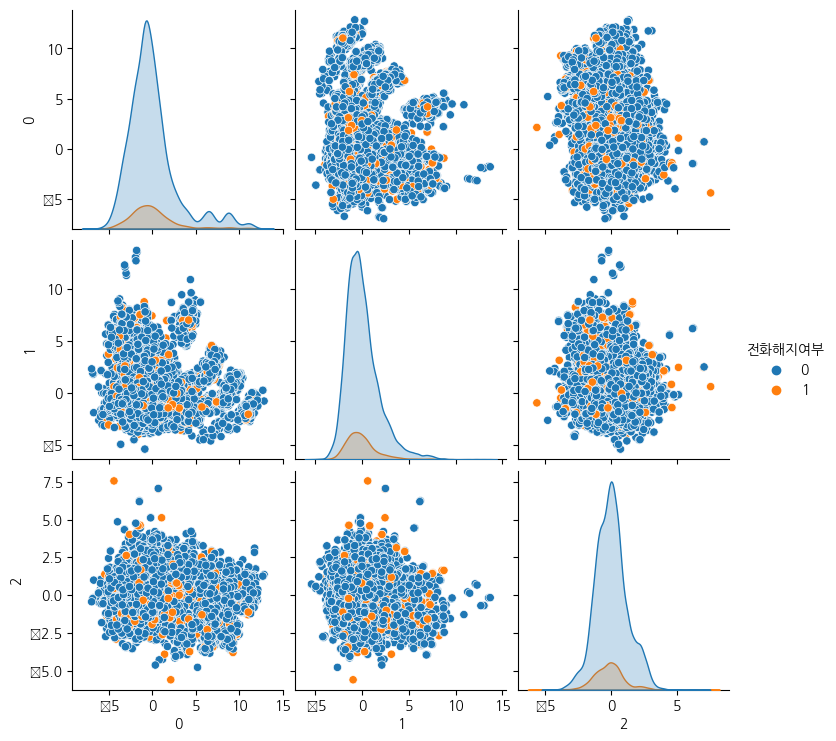

In [89]:
# 전화해지여부 열추가
temp['전화해지여부'] = train['전화해지여부']

# 그래프 출력
sns.pairplot(temp[[0, 1, 2, '전화해지여부']], hue = '전화해지여부')
plt.show()

In [90]:
temp[[0, 1, 2, '전화해지여부']]

,0,1,2,전화해지여부
0,-0.434679,-0.370313,-0.753919,0
1,4.640187,0.171327,4.018484,0
2,3.159454,-3.145138,0.672319,0
3,-0.957569,-1.576070,0.315229,0
4,-1.077370,-1.554536,-0.024510,0
...,...,...,...,...
30195,0.863182,-1.428204,-0.685859,0
30196,2.471849,-0.007324,1.908673,0
30197,-3.136418,2.256881,-1.685022,0
30198,1.841341,-1.441532,-0.219759,1


## RandomForest 데이터 마이닝

In [81]:
train = pd.concat([train, temp.iloc[:, 0:8]], axis = 1)
train

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,...,전체통화사용량,평균_상담전화건수,0,1,2,3,4,5,6,7
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,...,1119.9,0.006079,-0.434656,-0.370771,-0.764388,-3.049253,-0.239301,-0.448034,-1.081440,1.188361
1,TRAIN_00001,2,55,323.9,323,83.7,269.4,326,32.09,322.8,...,1774.1,1.000000,4.640211,0.170822,4.023951,1.082566,6.598100,3.322173,2.429685,3.060243
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,...,1743.2,0.000000,3.159477,-3.145699,0.668364,-0.473603,-0.425323,-0.335262,0.894645,0.611879
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,...,1176.2,0.000000,-0.957547,-1.576496,0.313307,-0.680953,-1.605748,0.433209,-0.458925,-0.029767
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,...,1097.3,0.036036,-1.077349,-1.554876,-0.024811,-0.859902,0.484459,1.707845,-0.270249,-1.663503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,55,289.6,201,21.8,280.5,323,29.88,208.0,...,1368.1,0.007605,0.863205,-1.428702,-0.684512,2.049458,-0.064395,-1.407937,2.719339,0.023226
30196,TRAIN_30196,283,55,210.7,280,90.5,284.1,202,32.80,287.8,...,1467.6,0.007067,2.471876,-0.008024,1.901306,-0.756562,-0.094719,-1.453281,2.654289,-0.828689
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,...,909.9,0.083333,-3.136396,2.256595,-1.683261,-0.052599,0.040105,1.645509,-0.389310,0.052257
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,...,1514.9,0.031746,1.841156,-1.438088,-0.210592,0.260775,0.682181,-0.334674,-0.804481,1.177208


In [82]:
train_x = train.copy().drop(['ID', '전화해지여부'], axis = 1)
train_y = train['전화해지여부']

In [83]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier()

In [92]:
model.feature_importances_

array([0.03081672, 0.01102471, 0.043785  , 0.02811056, 0.04092711,
       0.03791039, 0.02765553, 0.03411189, 0.03707984, 0.02876887,
       0.03646656, 0.01827739, 0.03755308, 0.03626421, 0.0294327 ,
       0.03424075, 0.03311287, 0.03714011, 0.03463208, 0.03470304,
       0.03077244, 0.02692663, 0.03110353, 0.03276559, 0.03698797,
       0.03620125, 0.0377413 , 0.03833363, 0.03796478, 0.03918949])

In [93]:
train_x.head().T

,0,1,2,3,4
가입일,329.000000,2.000000,93.000000,223.000000,222.000000
음성사서함이용,0.000000,55.000000,28.000000,1.000000,0.000000
주간통화시간,99.200000,323.900000,282.400000,221.400000,96.300000
주간통화횟수,93.000000,323.000000,323.000000,223.000000,222.000000
주간통화요금,27.300000,83.700000,34.200000,25.100000,28.700000
저녁통화시간,268.800000,269.400000,207.000000,233.000000,223.900000
저녁통화횟수,68.000000,326.000000,322.000000,61.000000,69.000000
저녁통화요금,28.920000,32.090000,32.820000,23.900000,28.080000
밤통화시간,262.900000,322.800000,280.800000,203.800000,263.100000
밤통화횟수,328.000000,209.000000,328.000000,234.000000,223.000000
